In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
data = json.load(open('/content/drive/MyDrive/project/Combined_LabelledData_462_역률평균.json', 'r', encoding='utf-8'))

In [3]:
data.keys()

dict_keys(['SVC_NAME', 'BASE_ITEM', 'DEVICE_ID', 'DEVICE_BD_ID', 'COMPANY_NAME', 'ESTABLISH_YEAR', 'LOCATION', 'COMPANY_TYPE', 'COMPANY_CAT', 'MAJOR_PRODUCT', 'CONTRACT_POWER', 'BILL_OPTION', 'KEPCO_INFO', 'facility_name', 'facility_type_name', 'facility_vendor', 'facility_year', 'facility_capacity', 'facility_volt', 'data'])

In [4]:
data['data'][0]

{'ITEM_NAME': '누적전력량',
 'ITEM_VALUE': 0,
 'TIMESTAMP': '2021-01-23 00:00:59',
 'LABEL_NAME': '경고'}

In [5]:
data['data'][0].values()

dict_values(['누적전력량', 0, '2021-01-23 00:00:59', '경고'])

In [6]:
key_list = ['Label']
for v in data['data']:
    v1, v2, v3, v4 = v.values()
    if v1 not in key_list:
        key_list.append(v1)
key_list

['Label',
 '누적전력량',
 '온도',
 '상전압평균',
 '선간전압평균',
 '전압고조파평균',
 '전류평균',
 '전류고조파평균',
 '역률평균',
 '무효전력평균',
 '주파수',
 '유효전력평균',
 'R상전압',
 'R상선간전압',
 'R상전류',
 'R상유효전력',
 'R상무효전력',
 'R상역률',
 'R상전압고조파',
 'R상전류고조파',
 'S상전압',
 'S상선간전압',
 'S상전류',
 'S상유효전력',
 'S상무효전력',
 'S상역률',
 'S상전압고조파',
 'S상전류고조파',
 'T상전압',
 'T상선간전압',
 'T상전류',
 'T상유효전력',
 'T상무효전력',
 'T상역률',
 'T상전압고조파',
 'T상전류고조파']

In [7]:
import numpy as np
e_dic = {}
time_list = []
cur = ''

for v in data['data']:
    v1, v2, v3, v4 = v.values()
    if cur != v3:
        time_list.append(v3)
        cur = v3
    if v1 in e_dic.keys():
        e_dic[v1][v3] = v2
        e_dic['Label'][v3] = v4
    else:
        e_dic[v1] = dict([(v3, v2)]) # key, value
        e_dic['Label'] = dict([(v3, v4)])
time_list = list(set(time_list))

In [8]:
e_dic[v1][v3]

3.027344

In [9]:
import csv
f = open('LabelledData_462.csv','w', newline='', encoding='cp949')
wr = csv.writer(f)
wr.writerow(key_list)

for t_k in time_list:
    app_list = []
    for k_l in key_list:
        app_list.append(e_dic[k_l][t_k])
    wr.writerow(app_list)
f.close()

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/LabelledData_462.csv', encoding='cp949')
df = df.dropna(axis=0)
df

,Label,누적전력량,온도,상전압평균,선간전압평균,전압고조파평균,전류평균,전류고조파평균,역률평균,무효전력평균,...,S상전압고조파,S상전류고조파,T상전압,T상선간전압,T상전류,T상유효전력,T상무효전력,T상역률,T상전압고조파,T상전류고조파
0,정상,460169.9000,45.000,230.000000,398.333344,2.799479,8.812500,3.580729,0.813498,3509.25,...,2.929688,2.832031,230.00,397.75,8.56250,1609.50,1115.25,0.820313,2.636719,3.808594
1,정상,584100.0630,44.375,231.416672,400.666656,1.399740,8.791667,2.734375,0.811096,3581.00,...,0.000000,2.148438,231.25,400.00,8.53125,1621.50,1129.50,0.820313,2.148438,2.832031
2,정상,345132.0310,46.250,231.083328,400.083344,2.506511,8.750000,3.320313,0.811674,3549.25,...,2.539063,2.539063,231.00,399.50,8.50000,1613.25,1125.75,0.816406,2.441406,3.613281
3,경고,17755.7266,47.500,230.583328,399.333344,2.604167,0.000000,0.000000,0.000000,0.00,...,2.636719,0.000000,230.50,398.75,0.00000,0.00,0.00,0.000000,2.636719,0.000000
4,정상,526599.4000,44.375,234.166672,405.583344,2.180990,8.822917,3.255208,0.804350,3674.00,...,2.246094,2.539063,234.00,404.50,8.50000,1611.25,1157.00,0.808594,2.343750,3.515625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,정상,114280.3360,47.500,227.583328,394.250000,2.604167,8.718750,3.352865,0.819023,3417.25,...,2.636719,2.636719,227.50,393.50,8.50000,1594.00,1092.50,0.824219,2.539063,3.710938
20156,정상,450610.6250,45.625,228.250000,395.416656,2.506511,8.750000,3.190104,0.817028,3457.00,...,2.539063,2.539063,228.50,394.75,8.53125,1603.50,1107.75,0.820313,2.539063,3.417969
20157,정상,142492.8750,48.125,228.333328,395.500000,2.376302,8.739583,3.092448,0.818222,3440.75,...,2.343750,2.343750,228.25,394.75,8.50000,1602.50,1096.75,0.824219,2.246094,3.417969
20158,경고,16436.3633,45.625,230.916672,400.000000,2.604167,0.000000,0.000000,0.000000,0.00,...,2.636719,0.000000,231.00,399.50,0.00000,0.00,0.00,0.000000,2.539063,0.000000


In [12]:
warning = 0
caution = 0
normal = 0

for i in range(20160):
    if df['Label'][i] == '경고': 
        warning += 1
    elif df['Label'][i] == '주의':
        caution += 1
    elif df['Label'][i] == '정상':
        normal += 1

print(warning, caution, normal)  

7642 5 12513


# 머신러닝

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.array(df.iloc[:,1:])
y = np.array(pd.get_dummies(df['Label']))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train.shape, y_train.shape

((16128, 35), (16128, 3))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# lr = LogisticRegression()
# lr.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

dtree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)
dtree.fit(X_train, y_train)

rfm = RandomForestClassifier(n_estimators = 100, max_depth=20, min_samples_leaf=3)
rfm.fit(X_train, y_train)

# svm = SVC(kernel='linear')
# svm.fit(X_train, y_train)

# svm_rbf = SVC(kernel='rbf')
# svm_rbf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=3)

In [ ]:
y_predict_knn = knn.predict(X_test)
y_predict_dtree = dtree.predict(X_test)
y_predict_rfm = rfm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

acc_knn = accuracy_score(y_test, y_predict_knn)
print('Acc of knn: {:.2f}%'.format(acc_knn*100))
acc_dtree = accuracy_score(y_test, y_predict_dtree)
print('Acc of dtree: {:.2f}%'.format(acc_dtree*100))
acc_rfm = accuracy_score(y_test, y_predict_rfm)
print('Acc of rfm: {:.2f}%'.format(acc_rfm*100))

Acc of knn: 99.65%
Acc of dtree: 99.48%
Acc of rfm: 99.63%


# 딥러닝

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.array(df.iloc[:,1:])
y = np.array(pd.get_dummies(df['Label']))

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
print(len(X_train_full))
print(len(X_test))
print(len(y_train_full))
print(len(y_test))
print(len(X_train))
print(len(X_valid))
print(len(y_train))
print(len(y_valid))

16128
4032
16128
4032
12902
3226
12902
3226


In [14]:
from tensorflow import keras

model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_dim=35),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 40, validation_data=(X_valid, y_valid))

Epoch 1/100
404/404 [==============================] - 2s 3ms/step - loss: 0.0713 - accuracy: 0.9907 - val_loss: 0.0192 - val_accuracy: 0.9963
Epoch 2/100
404/404 [==============================] - 1s 2ms/step - loss: 0.0156 - accuracy: 0.9974 - val_loss: 0.0173 - val_accuracy: 0.9963
Epoch 3/100
404/404 [==============================] - 1s 2ms/step - loss: 0.0147 - accuracy: 0.9974 - val_loss: 0.0175 - val_accuracy: 0.9963
Epoch 4/100
404/404 [==============================] - 1s 2ms/step - loss: 0.0142 - accuracy: 0.9974 - val_loss: 0.0172 - val_accuracy: 0.9963
Epoch 5/100
404/404 [==============================] - 1s 2ms/step - loss: 0.0140 - accuracy: 0.9974 - val_loss: 0.0161 - val_accuracy: 0.9963
Epoch 6/100
404/404 [==============================] - 1s 2ms/step - loss: 0.0137 - accuracy: 0.9974 - val_loss: 0.0161 - val_accuracy: 0.9963
Epoch 7/100
404/404 [==============================] - 1s 2ms/step - loss: 0.0138 - accuracy: 0.9974 - val_loss: 0.0162 - val_accuracy: 0.9963

In [15]:
model.evaluate(X_test, y_test)

126/126 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9948


[0.024410758167505264, 0.9947916865348816]

## epochs=100

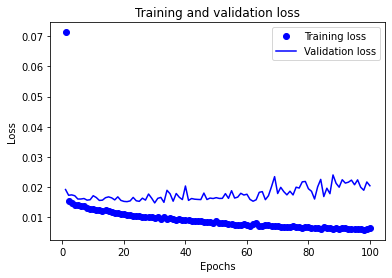

In [25]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

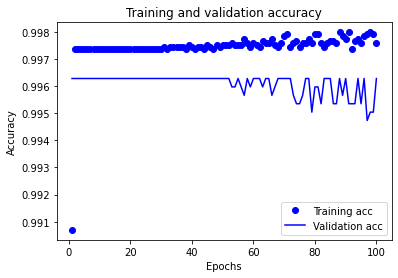

In [29]:
plt.clf() # 그래프를 초기화합니다.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# epochs=40(아직)

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf() # 그래프를 초기화합니다.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델저장

In [19]:
import os

cur_dir = os.getcwd() # 현재 작업디렉토리

model_h5_dir = 'save_model/h5'
model_h5_path = os.path.join(cur_dir, model_h5_dir)
model_h5_file = os.path.join(model_h5_path, 'h5_model.h5')
os.makedirs(model_h5_path, exist_ok=True)

In [24]:
model.save(model_h5_file, save_format='h5')

new_model = keras.models.load_model(model_h5_file) # 경로지정해줘도 됨
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1080      
                                                                 
 dense_1 (Dense)             (None, 8)                 248       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 1,355
Trainable params: 1,355
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save(model_h5_file, save_format='h5')

new_model = keras.models.load_model('/content/save_model/h5/h5_model.h5') # 경로지정해줘도 됨
new_model.summary()

In [23]:
new_model.evaluate(X_test, y_test)

126/126 [==============================] - 1s 3ms/step - loss: 0.0244 - accuracy: 0.9948


[0.024410758167505264, 0.9947916865348816]